#ASUM-DM

 Es un enfoque para la preparación y organización de datos que se enfoca en 5 etapas fundamentales:

Análisis, selección, unificación, muestreo y depuración.

Este proceso es útil para mejorar la calidad de los datos antes de usarlos en modelos de análisis y aprendizaje automático



Contesto el problema:
análisis de clientes para estrategias de marketing personalizada una empresa de servicios financieros quiere lanzar una campaña de marketing personalizada para sus clientes de varias ciudades.
 La idea es identificar perfiles de clientes en función de características como edad, ingresos y categoría de cliente para definir estrategias.

El equipo de marketing ha solicitado los analistas de datos e identificar:


segmentos de clientes:
agrupar a los clientes en función de su categoría, ingresos, edad y ciudad.

Tendencias de ingresos:
 analizar la distribución de los ingresos mensuales y detectar patrones en diferentes ciudades y edades.

Clientes potenciales:
identificar clientes con altos ingresos y en categoría de alto valor(“A”) para campañas específicas.

Sin embargo, el conjunto de datos tiene varios problemas qué dificultan el análisis directo, cómo duplicados, valores atípicos y errores tipográficos.

Antes de aplicar modelos de segmentación y análisis de tendencias, es necesario limpiar y organizar la información


# 1 Análisis de los datos (A):

Objetivo:

 examinar la calidad y característica de los datos.

 Acciones:
  revisar el conjunto de datos para identificar valores faltantes,  datos inconsistentes, duplicados, errores tipográficos y valores atípicos.

Este paso permite entender el tipo de problema que podrían afectar el análisis y decidir cómo resolverlos.


In [4]:
#importar librerias necesarias
import pandas as pd

In [26]:
#leer el archivo csv en un DataFrame
df = pd.read_csv("clientes_con_errores.csv")
#contar cantidad de registros
df.count()

ID_cliente         501
Edad               390
Ingreso_mensual    257
Categoría          442
Ciudad             406
País               251
dtype: int64

In [27]:
#mostrar primeras filas del dataframe
print("======================Vista inicial del DataFrame===========================")
display(df.head()) #es como un print pero exclusivo para estos tipos de libros


======================Vista inicial del DataFrame===========================


,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
0,ID_001,-1.0,NaN,b,NaN,NaN
1,ID_002,NaN,NaN,b,Ciudad_B,Pais_Y
2,ID_003,150.0,7646.28,A,Ciudad_B,NaN
3,ID_004,30.0,-500.00,VIP,Ciudad123,Pais_X
4,ID_005,150.0,NaN,a,ciudad_a,Pais_X


In [28]:
# 1. verificar valores nulos
print("\n Valores nulos por columnas:")
df.isnull().sum()


 Valores nulos por columnas:


ID_cliente           0
Edad               111
Ingreso_mensual    244
Categoría           59
Ciudad              95
País               250
dtype: int64

In [29]:
# Identificar edades inconsistentes 
# consideremos que las edades válidas estan entre 18 y 90
edades_inconsistentes = df[(df["Edad"]<18)|(df['Edad']>90)|(df['Edad'].isnull())]
print(edades_inconsistentes)

    ID_cliente   Edad  Ingreso_mensual Categoría     Ciudad    País
0       ID_001   -1.0              NaN         b        NaN     NaN
1       ID_002    NaN              NaN         b   Ciudad_B  Pais_Y
2       ID_003  150.0          7646.28         A   Ciudad_B     NaN
4       ID_005  150.0              NaN         a   ciudad_a  Pais_X
5       ID_006   -1.0         16558.77         B        NaN  Pais_Y
..         ...    ...              ...       ...        ...     ...
494     ID_495   -1.0              NaN       VIP        NaN     NaN
495     ID_496   -1.0              NaN         A   Ciudad_A     NaN
496     ID_497   -1.0              NaN         a  Ciudad123     NaN
497     ID_498    NaN              NaN         A   Ciudad-C  Pais_Y
498     ID_499  150.0         10781.73         a   Ciudad-C     NaN

[371 rows x 6 columns]


In [30]:
# 3 identificar inconsistencias en los nombres de ciudad
# ver una lista única de las ciudades ingresadas para detectar variaciones 
ciudade_unicas= df['Ciudad'].dropna().unique() #.unique identifica los nombres unicos y drop borra las repetidas
print("Ciudades unicas")
print(ciudade_unicas)

Ciudades unicas
['Ciudad_B' 'Ciudad123' 'ciudad_a' 'Ciudad_A' 'Ciudad-C']


# 2 Selección  de los datos (S):

Objetivo: Elegir las variables y los registros más relevantes para el análisis.


Acciones: Determinar qué columna (atributos) y filas (registros) son útiles para el objetivo del análisis.

Eliminar variables redundantes, irrelevantes o registros que no aportan valor lo cual ayuda a mejorar la eficiencia del procesamiento.

Filtrado de flilas(registros):
Eliminar registros que tengan:
Edades fuera del rango razonable (18 a 90).
ingresos no númericos o valores negativos.
categorías de clientes a "A", "B", "C"

"A" cliente de alto valor

"B" cliente de valor medio

"C" cliente de bajo valor

In [31]:
#Filtro de los datos
# 1 seleccion de columnas utiles
# 2 filtrado de valores inconsistentes
# 3 filtrar edades en eun rango de 18 a 90 años
df_filtrado = df[(df['Edad']>= 18) & (df['Edad']<=90)]
df_filtrado

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
3,ID_004,30.0,-500.0,VIP,Ciudad123,Pais_X
8,ID_009,48.0,-500.0,a,NaN,Pais_Y
10,ID_011,33.0,NaN,B,Ciudad_A,NaN
12,ID_013,54.0,NaN,NaN,ciudad_a,NaN
13,ID_014,81.0,NaN,A,Ciudad_B,NaN
...,...,...,...,...,...,...
488,ID_489,66.0,NaN,B,Ciudad123,Pais_Y
491,ID_492,62.0,NaN,A,Ciudad_B,NaN
492,ID_493,55.0,NaN,NaN,ciudad_a,Pais_Y
499,ID_500,36.0,NaN,A,NaN,NaN


In [32]:
#Filtro de ingresos validos (quitar ingresos no numericos y valores negativos)
df_filtrado['Ingreso_mensual'] = pd.to_numeric(df_filtrado["Ingreso_mensual"], 
errors="coerce")
df_filtrado = df_filtrado[df_filtrado['Ingreso_mensual']>0]
df_filtrado

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12124\2073530344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Ingreso_mensual'] = pd.to_numeric(df_filtrado["Ingreso_mensual"],


,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
18,ID_019,22.0,12422.06,VIP,Ciudad_B,NaN
20,ID_021,29.0,3584.98,C,Ciudad_A,NaN
25,ID_026,29.0,11771.21,NaN,Ciudad_B,Pais_Y
42,ID_043,89.0,16732.84,b,Ciudad123,NaN
51,ID_052,54.0,13878.16,B,Ciudad_A,NaN
57,ID_116,78.0,5799.32,A,Ciudad123,NaN
76,ID_077,26.0,6953.78,B,Ciudad123,NaN
93,ID_094,72.0,14026.67,VIP,NaN,Pais_X
106,ID_107,24.0,3797.23,C,Ciudad_B,Pais_X
125,ID_126,56.0,5685.07,b,Ciudad123,NaN


In [33]:
#camBiar categorias a por A, b po B y c por C
df_filtrado["Categoría"]=df_filtrado["Categoría"].replace('a','A')
df_filtrado["Categoría"]=df_filtrado["Categoría"].replace('c','C')
df_filtrado["Categoría"]=df_filtrado["Categoría"].replace('b','B')
df_filtrado

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12124\3555857920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["Categoría"]=df_filtrado["Categoría"].replace('a','A')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12124\3555857920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["Categoría"]=df_filtrado["Categoría"].replace('c','C')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12124\3555857920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
18,ID_019,22.0,12422.06,VIP,Ciudad_B,NaN
20,ID_021,29.0,3584.98,C,Ciudad_A,NaN
25,ID_026,29.0,11771.21,NaN,Ciudad_B,Pais_Y
42,ID_043,89.0,16732.84,B,Ciudad123,NaN
51,ID_052,54.0,13878.16,B,Ciudad_A,NaN
57,ID_116,78.0,5799.32,A,Ciudad123,NaN
76,ID_077,26.0,6953.78,B,Ciudad123,NaN
93,ID_094,72.0,14026.67,VIP,NaN,Pais_X
106,ID_107,24.0,3797.23,C,Ciudad_B,Pais_X
125,ID_126,56.0,5685.07,B,Ciudad123,NaN


In [34]:
# filtrar categoria validas
categorias_validas=['A','B','C']
df_filtrado=df_filtrado[df_filtrado["Categoría"].isin(categorias_validas)]#isin indica que ejecute mientras sean iguales a lo que haya dentro de ()
df_filtrado

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,Ciudad_A,NaN
42,ID_043,89.0,16732.84,B,Ciudad123,NaN
51,ID_052,54.0,13878.16,B,Ciudad_A,NaN
57,ID_116,78.0,5799.32,A,Ciudad123,NaN
76,ID_077,26.0,6953.78,B,Ciudad123,NaN
106,ID_107,24.0,3797.23,C,Ciudad_B,Pais_X
125,ID_126,56.0,5685.07,B,Ciudad123,NaN
138,ID_139,57.0,1861.35,A,NaN,Pais_X
153,ID_154,31.0,14234.22,B,Ciudad123,Pais_X
154,ID_155,51.0,1749.90,C,NaN,NaN


In [35]:
# ver ID_cliente duplicados 
duplicados = df[df.duplicated(subset=["ID_cliente"],keep=False)]['ID_cliente'].unique()
duplicados #ver en original porqeu con lo anterior habiamos quitado los duplicados

array(['ID_184', 'ID_015', 'ID_439', 'ID_085', 'ID_285', 'ID_145',
       'ID_143', 'ID_042', 'ID_045', 'ID_401', 'ID_116', 'ID_094',
       'ID_105', 'ID_107', 'ID_155', 'ID_268', 'ID_120', 'ID_129',
       'ID_133', 'ID_136', 'ID_324', 'ID_152', 'ID_362', 'ID_185',
       'ID_188', 'ID_190', 'ID_269', 'ID_203', 'ID_206', 'ID_212',
       'ID_246', 'ID_425', 'ID_470', 'ID_281', 'ID_289', 'ID_310',
       'ID_332', 'ID_437', 'ID_421', 'ID_453', 'ID_497', 'ID_500'],
      dtype=object)

In [36]:
#en caso de haber duplicados en el que estamos trabajando 
df_filtrado = df_filtrado.drop_duplicates(subset=["ID_cliente"])
df_filtrado

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,Ciudad_A,NaN
42,ID_043,89.0,16732.84,B,Ciudad123,NaN
51,ID_052,54.0,13878.16,B,Ciudad_A,NaN
57,ID_116,78.0,5799.32,A,Ciudad123,NaN
76,ID_077,26.0,6953.78,B,Ciudad123,NaN
106,ID_107,24.0,3797.23,C,Ciudad_B,Pais_X
125,ID_126,56.0,5685.07,B,Ciudad123,NaN
138,ID_139,57.0,1861.35,A,NaN,Pais_X
153,ID_154,31.0,14234.22,B,Ciudad123,Pais_X
154,ID_155,51.0,1749.90,C,NaN,NaN


In [37]:
# contar los valores duplicados en la columna 'ID_cliente'
duplicados_counts= df["ID_cliente"].value_counts()
#Mostrar solo lo sque tienen mas de una aparicion en el csv
duplicados_counts = duplicados_counts[duplicados_counts>1]
print(duplicados_counts)

ID_cliente
ID_045    4
ID_120    3
ID_116    3
ID_129    3
ID_184    3
ID_133    2
ID_324    2
ID_500    2
ID_136    2
ID_268    2
ID_246    2
ID_152    2
ID_190    2
ID_212    2
ID_269    2
ID_143    2
ID_105    2
ID_042    2
ID_206    2
ID_107    2
ID_155    2
ID_185    2
ID_203    2
ID_188    2
ID_401    2
ID_362    2
ID_094    2
ID_425    2
ID_470    2
ID_281    2
ID_289    2
ID_453    2
ID_332    2
ID_437    2
ID_421    2
ID_497    2
ID_310    2
ID_015    2
ID_439    2
ID_085    2
ID_285    2
ID_145    2
Name: count, dtype: int64


In [38]:
#cantidad de registros y columnas tras la limpieza
print("Cantidad de registros y columnas tras la limpieza")
print(df_filtrado.shape)
print(df.shape)

Cantidad de registros y columnas tras la limpieza
(25, 6)
(501, 6)


# 3 Unificación y normalización de valores(U)

Estandarizar los nombre de ciudades para tener consistencia en los datos y facilitar el análisis posterir.
pasos:
Normalización de los nombres de ciudades: Convertir todos los nombres a un formato consistente ,eliminar errores tipográficos y variaciones en mayúsculas/minúsculas también corregiremos cualquier variación que deba agruparse
Ejemplos:
"Ciudad_A" y "ciudad_a deben ser iguales


In [39]:
df_filtrado["Ciudad"]=df_filtrado["Ciudad"].str.lower().str.strip()
df_filtrado

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad123,NaN
51,ID_052,54.0,13878.16,B,ciudad_a,NaN
57,ID_116,78.0,5799.32,A,ciudad123,NaN
76,ID_077,26.0,6953.78,B,ciudad123,NaN
106,ID_107,24.0,3797.23,C,ciudad_b,Pais_X
125,ID_126,56.0,5685.07,B,ciudad123,NaN
138,ID_139,57.0,1861.35,A,NaN,Pais_X
153,ID_154,31.0,14234.22,B,ciudad123,Pais_X
154,ID_155,51.0,1749.90,C,NaN,NaN


In [40]:
# corregir variaciones comunes en el nombre de ciudades
df_filtrado['Ciudad']=df_filtrado['Ciudad'].replace({
    'ciudad-a':'ciudad_a',
    'ciudad123':'ciudad_a',
    'ciudad-b':'ciudad_b',
    'ciudad-c':'ciudad_c'
})
df_filtrado

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad_a,NaN
51,ID_052,54.0,13878.16,B,ciudad_a,NaN
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
76,ID_077,26.0,6953.78,B,ciudad_a,NaN
106,ID_107,24.0,3797.23,C,ciudad_b,Pais_X
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
138,ID_139,57.0,1861.35,A,NaN,Pais_X
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
154,ID_155,51.0,1749.90,C,NaN,NaN


In [41]:
# verificar la lista de ciudades únicas después de la normalización
ciudades_unicas=df_filtrado['Ciudad'].dropna().unique()
print("\n Ciudades únicas")
print(ciudades_unicas)


 Ciudades únicas
['ciudad_a' 'ciudad_b' 'ciudad_c']


In [42]:
# Eliminar ciudad con valores NaN
df_filtrado=df_filtrado.dropna(subset=['Ciudad'])
df_filtrado

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad_a,NaN
51,ID_052,54.0,13878.16,B,ciudad_a,NaN
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
76,ID_077,26.0,6953.78,B,ciudad_a,NaN
106,ID_107,24.0,3797.23,C,ciudad_b,Pais_X
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
155,ID_156,74.0,17520.34,B,ciudad_b,Pais_X
230,ID_246,70.0,11927.53,A,ciudad_a,NaN


# 4 Muestreo representativo(M):


Si es necesario, crear un subconjunto de dotos representativos para pruebas iniciales de segmentación
pasos:

Definir el tamaño de la Muestra:

Asegurar representatividad en categorías clave:

Revisar y validar la muestra:


In [43]:
# Definir el tamaño de la muestra
# 10% de los datos
#muestra_size=int(0.1*len(df_filtrado))
muestra_size=int(1*len(df_filtrado))# 100%
# Realizar el muesteo estratificado
# Utilizaremos las columnas Categoría y ciudad como estratos para asegurar representavilidad
muestra=df_filtrado.groupby(['Categoría','Ciudad'],group_keys=False).apply(
    lambda x:x.sample(min(len(x),muestra_size//len(df_filtrado['Categoría'].unique())))
)
muestra

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12124\3705405554.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  muestra=df_filtrado.groupby(['Categoría','Ciudad'],group_keys=False).apply(


,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
272,ID_273,36.0,5662.07,A,ciudad_a,NaN
393,ID_394,58.0,7439.77,A,ciudad_a,NaN
230,ID_246,70.0,11927.53,A,ciudad_a,NaN
249,ID_250,45.0,12777.62,A,ciudad_a,NaN
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad_a,NaN
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
307,ID_308,19.0,5097.94,B,ciudad_a,Pais_Y
51,ID_052,54.0,13878.16,B,ciudad_a,NaN


In [44]:
# Revisar la distribución de la muestra
print("\n Distribución de la muestra por categorías")
print(muestra['Categoría'].value_counts())
print("\n Distribuvión de la muestra por ciudad")
print(muestra['Ciudad'].value_counts(normalize=True))#devulve valores entre 0 y  1 reprecenta %


 Distribución de la muestra por categorías
Categoría
B    10
A     5
C     2
Name: count, dtype: int64

 Distribuvión de la muestra por ciudad
Ciudad
ciudad_a    0.705882
ciudad_b    0.235294
ciudad_c    0.058824
Name: proportion, dtype: float64


In [45]:
print("Distribución de la muestra por rango de edad:")
print(pd.cut(muestra['Edad'],bins=[18,30,40,50,60,90]).value_counts(normalize=True))

Distribución de la muestra por rango de edad:
Edad
(60, 90]    0.3125
(18, 30]    0.2500
(30, 40]    0.1875
(50, 60]    0.1875
(40, 50]    0.0625
Name: proportion, dtype: float64


# 5 Depuración final (D):


In [47]:
import numpy as np
# deteccion y tratamiento de valores atipicos en ingresos
# calculo de rango intercuartilico para la detección de valores atipicos
q1= muestra['Ingreso_mensual'].quantile(0.25)
q3= muestra['Ingreso_mensual'].quantile(0.75)
IQR=q3-q1
#definir limites para valores atipicos 
limite_inferior=q1 - 1.5*IQR
limite_superior= q3 + 1.5*IQR
#filtro valores atipicos fuera de los limites y reemplazaarlos con NaN para trabajarlos posteriormente
muestra['Ingreso_mensual']=muestra['Ingreso_mensual'].apply(
     lambda x: x if limite_inferior <= x <= limite_superior else np.nan) 
muestra

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
272,ID_273,36.0,5662.07,A,ciudad_a,NaN
393,ID_394,58.0,7439.77,A,ciudad_a,NaN
230,ID_246,70.0,11927.53,A,ciudad_a,NaN
249,ID_250,45.0,12777.62,A,ciudad_a,NaN
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad_a,NaN
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
307,ID_308,19.0,5097.94,B,ciudad_a,Pais_Y
51,ID_052,54.0,13878.16,B,ciudad_a,NaN


In [48]:
#Mostrar la cantidad de valores atipicos detectados
print(muestra['Ingreso_mensual'].isna().sum())

0


In [ ]:
#rellenar valores NaN en 'Ingreso_mensual' con la mediana 
mediana_ingreso= muestra['Ingreso_mensual'].median()
muestra['ingreso_mensual'].fillna(mediana_ingreso,inplace=True)

In [49]:
# Aplicar normalizacion  Min-Max 
muestra['Ingreso_mensual_normalizado']=(muestra['Ingreso_mensual']-muestra['Ingreso_mensual'].min())/\
(muestra['Ingreso_mensual'].max()-muestra['Ingreso_mensual'].min())
muestra

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País,Ingreso_mensual_normalizado
57,ID_116,78.0,5799.32,A,ciudad_a,NaN,0.242899
272,ID_273,36.0,5662.07,A,ciudad_a,NaN,0.234282
393,ID_394,58.0,7439.77,A,ciudad_a,NaN,0.345888
230,ID_246,70.0,11927.53,A,ciudad_a,NaN,0.627636
249,ID_250,45.0,12777.62,A,ciudad_a,NaN,0.681005
125,ID_126,56.0,5685.07,B,ciudad_a,NaN,0.235726
42,ID_043,89.0,16732.84,B,ciudad_a,NaN,0.929319
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X,0.772452
307,ID_308,19.0,5097.94,B,ciudad_a,Pais_Y,0.198865
51,ID_052,54.0,13878.16,B,ciudad_a,NaN,0.750099


In [50]:
# asegurar qeu las columna 'edad' no tenga valores atipicos fuera del rango (18 a 90)
muestra['Edad'] = muestra['Edad'].apply(lambda x: x if 18 <= x <= 90 else None)

In [51]:
# segurar que Categoria y ciudad esten en un formato consistente 
muestra['Categoría'] = muestra['Categoría'].str.lower()
muestra['Ciudad']=muestra['Ciudad'].str.capitalize()
muestra

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País,Ingreso_mensual_normalizado
57,ID_116,78.0,5799.32,a,Ciudad_a,NaN,0.242899
272,ID_273,36.0,5662.07,a,Ciudad_a,NaN,0.234282
393,ID_394,58.0,7439.77,a,Ciudad_a,NaN,0.345888
230,ID_246,70.0,11927.53,a,Ciudad_a,NaN,0.627636
249,ID_250,45.0,12777.62,a,Ciudad_a,NaN,0.681005
125,ID_126,56.0,5685.07,b,Ciudad_a,NaN,0.235726
42,ID_043,89.0,16732.84,b,Ciudad_a,NaN,0.929319
153,ID_154,31.0,14234.22,b,Ciudad_a,Pais_X,0.772452
307,ID_308,19.0,5097.94,b,Ciudad_a,Pais_Y,0.198865
51,ID_052,54.0,13878.16,b,Ciudad_a,NaN,0.750099


# 6 con los datos organizados y depurados:

Aplicar técnicas de segmentación de clientes para identificar distintos perfiles dentro del conjunto de datos.


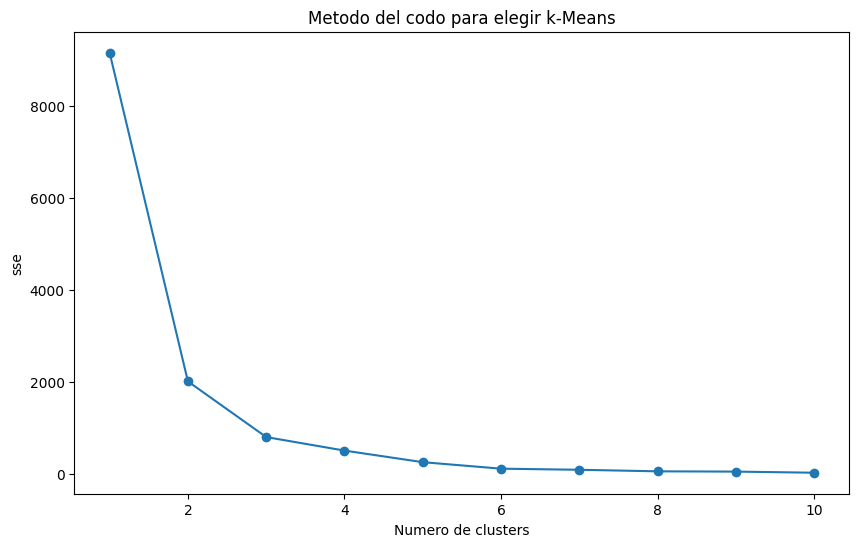

In [66]:

from sklearn.cluster import KMeans #pip install scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
# seleccion de variables relevantes para la segmentación 
#edad e ingreso mensual normalizado
x=muestra[['Edad','Ingreso_mensual_normalizado']]
# Encontrar el numero optimo de clusters con el metodo del codo 
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=0).fit(x)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11),sse,marker="o")
plt.xlabel('Numero de clusters')
plt.ylabel('sse')#mide que tan lejos están los puntos 
plt.title('Metodo del codo para elegir k-Means')
plt.show()

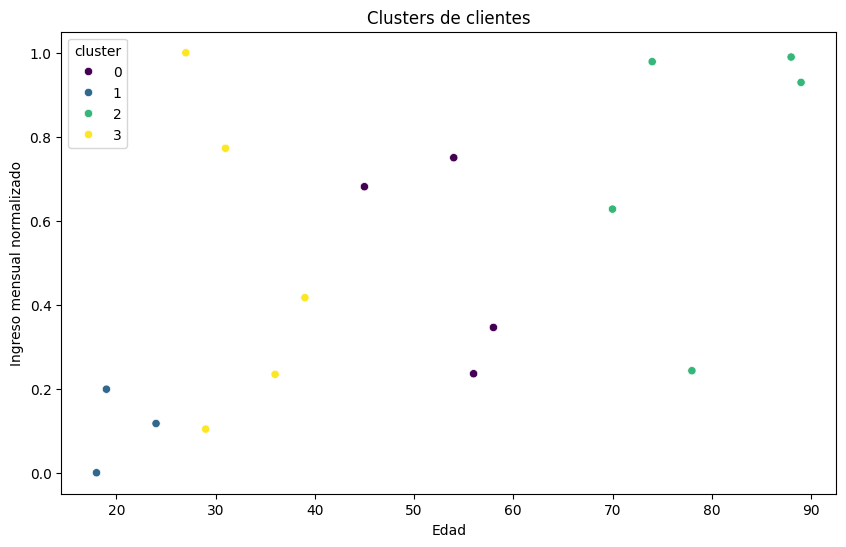

In [67]:
# aplicar k-Means con el número optimo de clusters 
kmeans = KMeans(n_clusters=4,random_state=0)
muestra['cluster']=kmeans.fit_predict(x)

#visualizar los clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=muestra,x='Edad',y='Ingreso_mensual_normalizado',hue='cluster',
                palette='viridis')
plt.title("Clusters de clientes")
plt.xlabel('Edad')
plt.ylabel('Ingreso mensual normalizado')
plt.show()

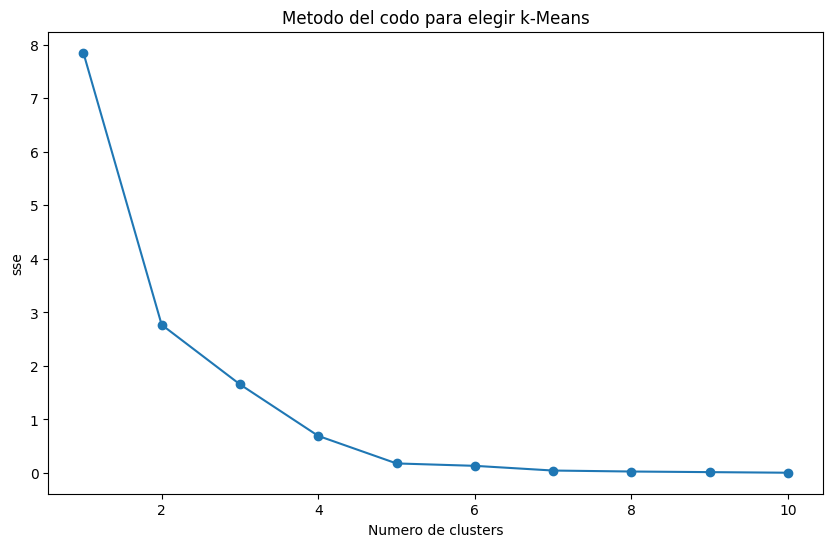

In [71]:
# seleccion de variables relevantes para la segmentación 
# ciudad e ingreso mensual normalizado
# asignar un numeor a cada ciudad
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
muestra['Ciudad_codigo']=le.fit_transform(muestra["Ciudad"])
x=muestra[['Ciudad_codigo','Ingreso_mensual_normalizado']]
# Encontrar el numero optimo de clusters con el metodo del codo 
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=0).fit(x)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11),sse,marker="o")
plt.xlabel('Numero de clusters')
plt.ylabel('sse')#mide que tan lejos están los puntos 
plt.title('Metodo del codo para elegir k-Means')
plt.show()

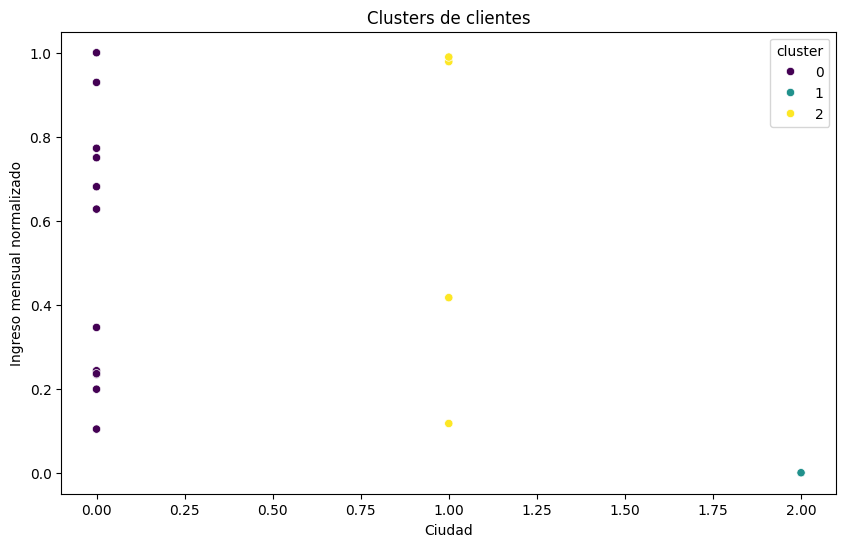

In [74]:
# aplicar k-Means con el número optimo de clusters 
kmeans = KMeans(n_clusters=3,random_state=0)
muestra['cluster']=kmeans.fit_predict(x)

#visualizar los clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=muestra,x='Ciudad_codigo',y='Ingreso_mensual_normalizado',hue='cluster',
                palette='viridis')
plt.title("Clusters de clientes")
plt.xlabel('Ciudad')
plt.ylabel('Ingreso mensual normalizado')
plt.show()